In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")
import scipy as sp
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from datetime import datetime

In [284]:
exec(open("../../header.py").read())

# Import data

In [285]:
X = pd.read_csv(processed_root('cervical_cancer_risks/X.csv'))
y = pd.read_csv(processed_root('cervical_cancer_risks/y.csv'))

# Fit model

In [286]:
# fit RF
rf = RandomForestClassifier(n_estimators = 500)
rf.fit(X, y['Biopsy'])

RandomForestClassifier(n_estimators=500)

# Use class

In [287]:
exec(open("../../header.py").read())

In [288]:
ice = ICE("binary", trace = False)

In [289]:
ice.fit_single_feature(X, rf, "Age")

Fit Age in 1.80 seconds


Preprocessed data in 0.04 seconds
Plotted in 0.47 seconds


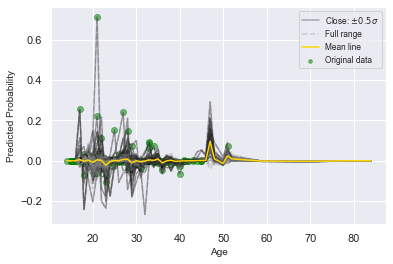

In [290]:
ice.ice_plot_single_feature('Age', plot_num = 200, mode = "d-ice")

In [291]:
ice.get_feature_impact("Age")

{'Feature': 'Age',
 'Feature Impact': 0.1519146106435773,
 'In-Dist Feature Impact': 0.1532652643376939}

In [292]:
ice.feature_impact_table()

,Feature,Feature Impact,In-Dist Feature Impact,Normalized Feature Impact,Normalized In-Dist Feature Impact
0,Age,0.151915,0.153265,100.0,100.0


In [293]:
ice.fit(X, rf)

Fit Age in 1.71 seconds
Fit Number of sexual partners in 1.07 seconds
Fit First sexual intercourse in 2.29 seconds
Fit Num of pregnancies in 1.01 seconds
Fit Smokes in 0.83 seconds
Fit Smokes (years) in 1.45 seconds
Fit Smokes (packs/year) in 2.05 seconds
Fit Hormonal Contraceptives in 0.83 seconds
Fit Hormonal Contraceptives (years) in 1.61 seconds
Fit IUD in 0.88 seconds
Fit IUD (years) in 1.41 seconds
Fit STDs in 0.82 seconds
Fit STDs (number) in 0.97 seconds
Fit STDs:condylomatosis in 0.88 seconds
Fit STDs:cervical condylomatosis in 0.77 seconds
Fit STDs:vaginal condylomatosis in 0.82 seconds
Fit STDs:vulvo-perineal condylomatosis in 0.88 seconds
Fit STDs:syphilis in 0.86 seconds
Fit STDs:pelvic inflammatory disease in 1.02 seconds
Fit STDs:genital herpes in 0.91 seconds
Fit STDs:molluscum contagiosum in 0.84 seconds
Fit STDs:AIDS in 0.76 seconds
Fit STDs:HIV in 0.89 seconds
Fit STDs:Hepatitis B in 0.81 seconds
Fit STDs:HPV in 0.82 seconds
Fit STDs: Number of diagnosis in 0.84 seco

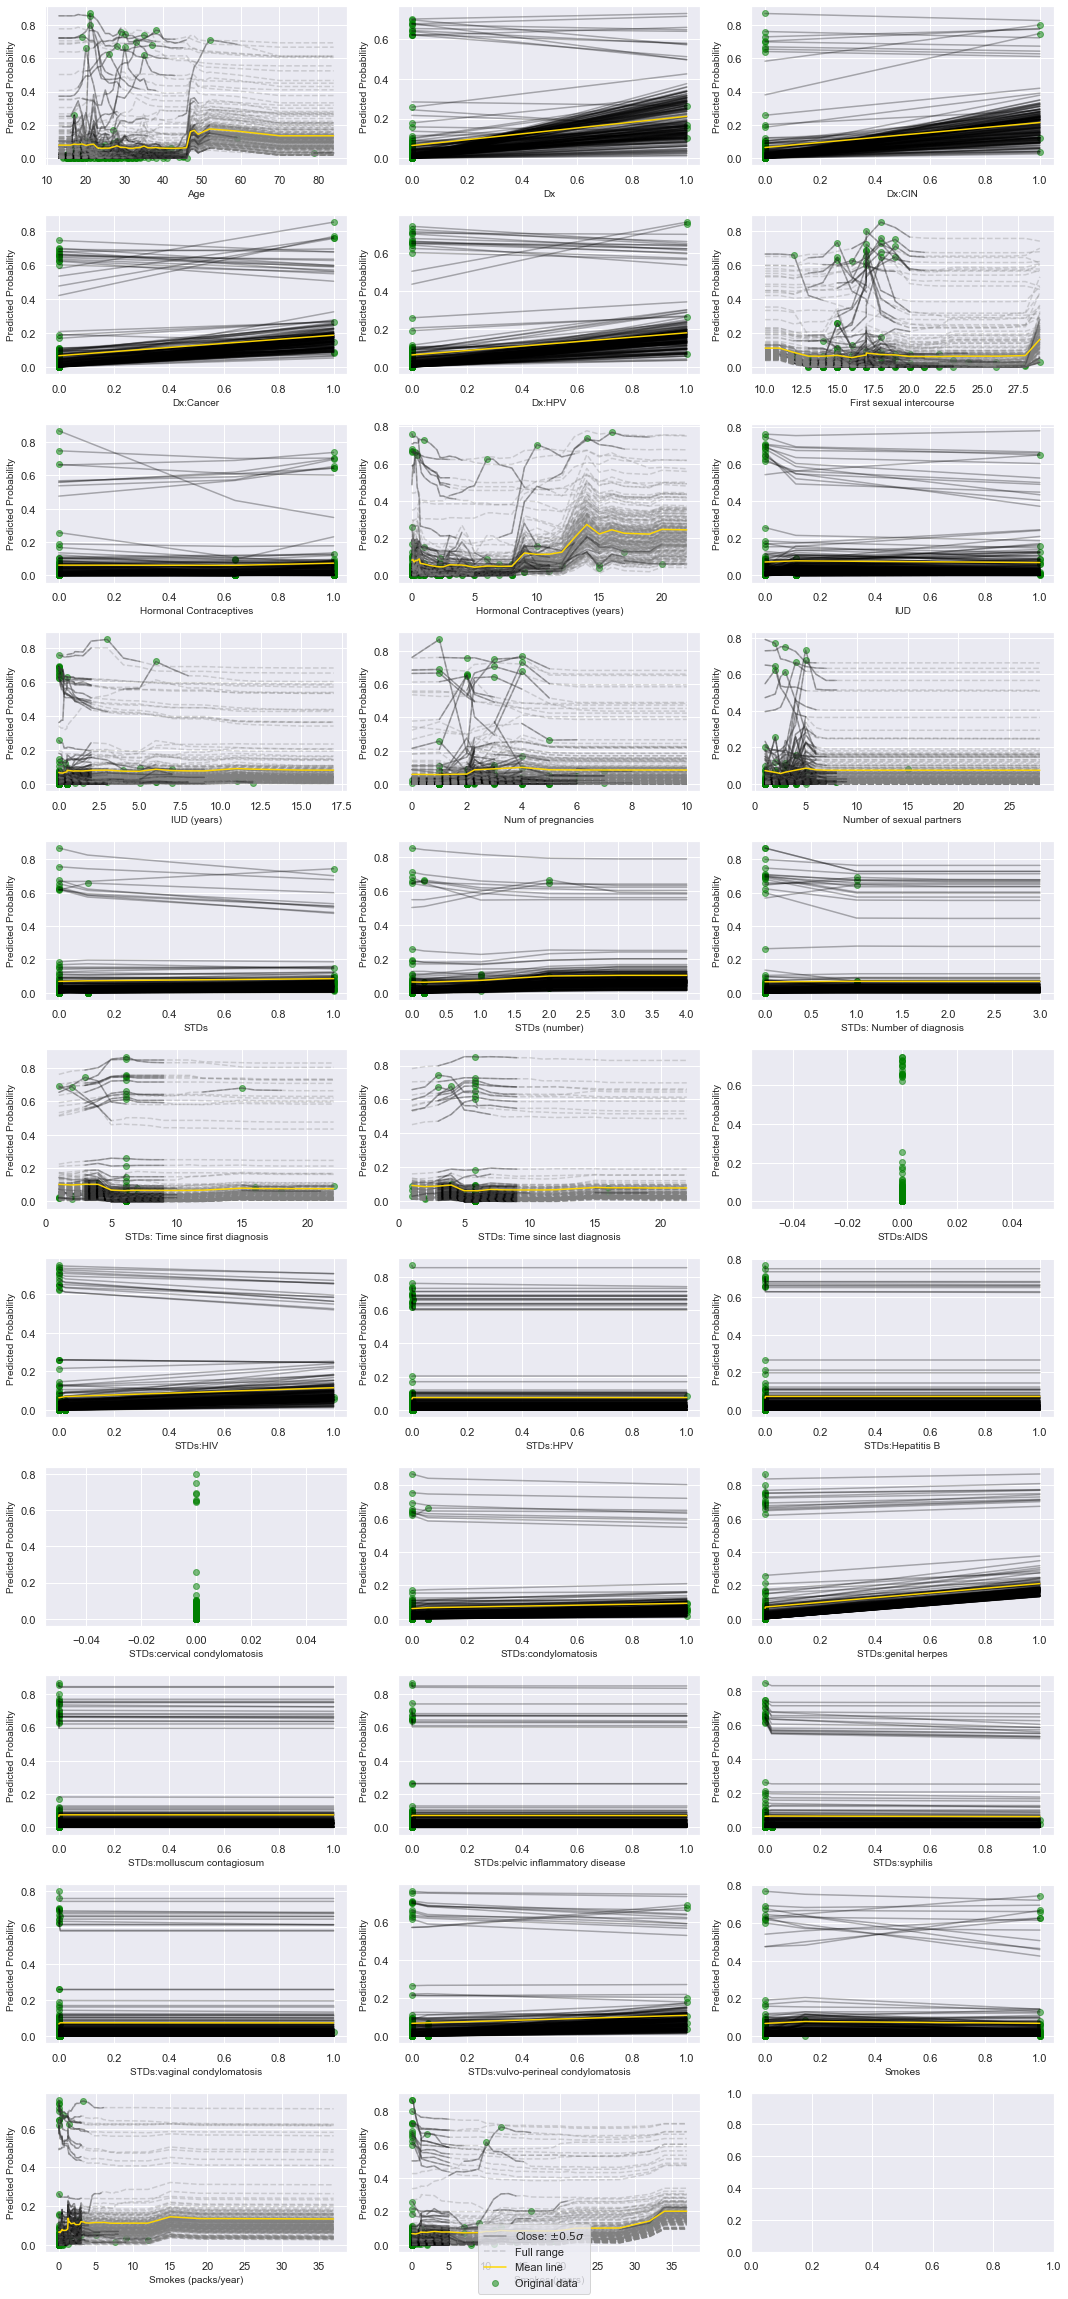

In [294]:
# ice.ice_plot(results_root("ice-plot-from-class/all_plots.pdf"))
ice.ice_plot(mode = "ice")

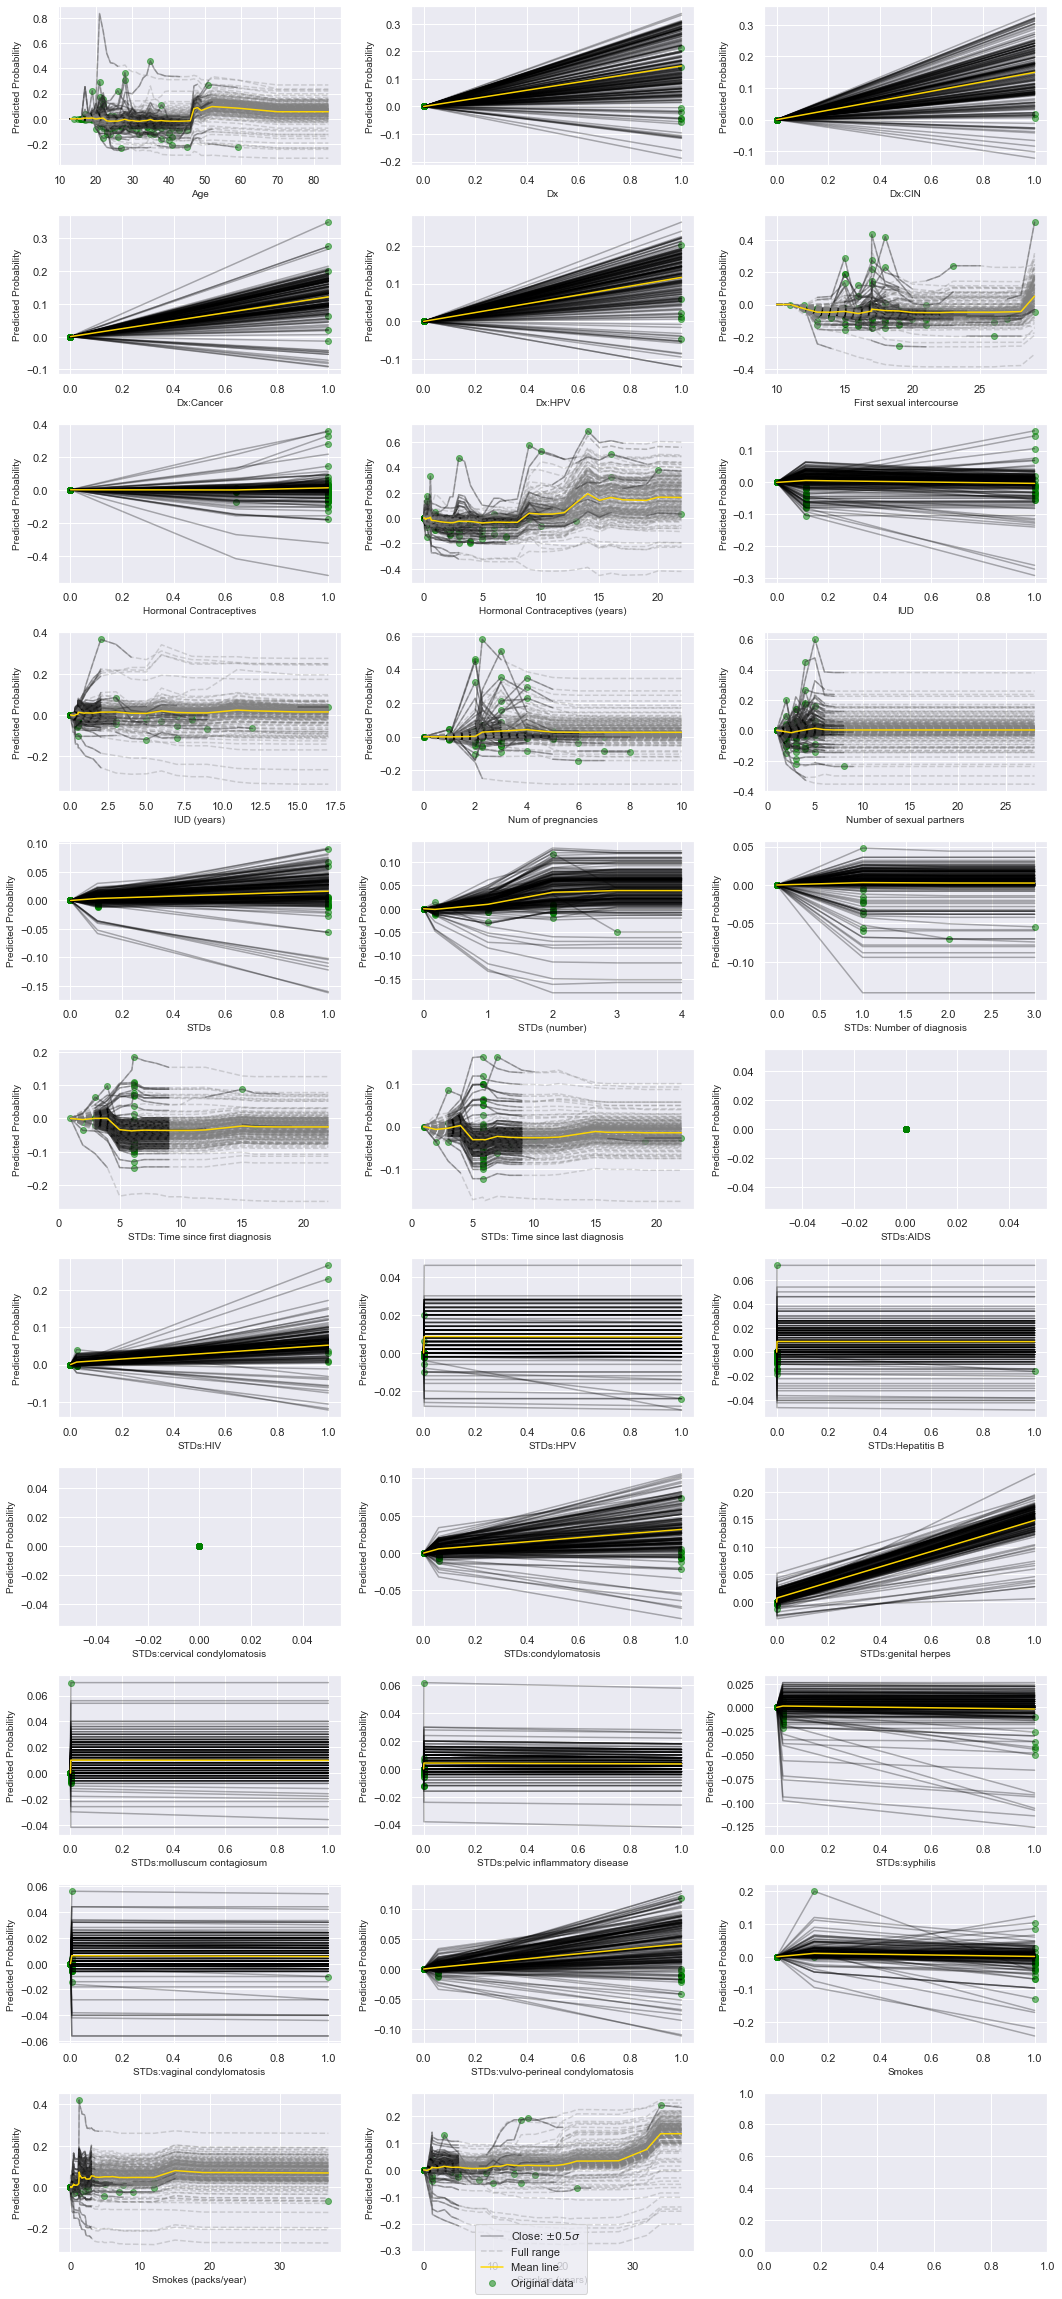

In [295]:
# ice.ice_plot(results_root("ice-plot-from-class/all_plots.pdf"))
ice.ice_plot(mode = "c-ice")

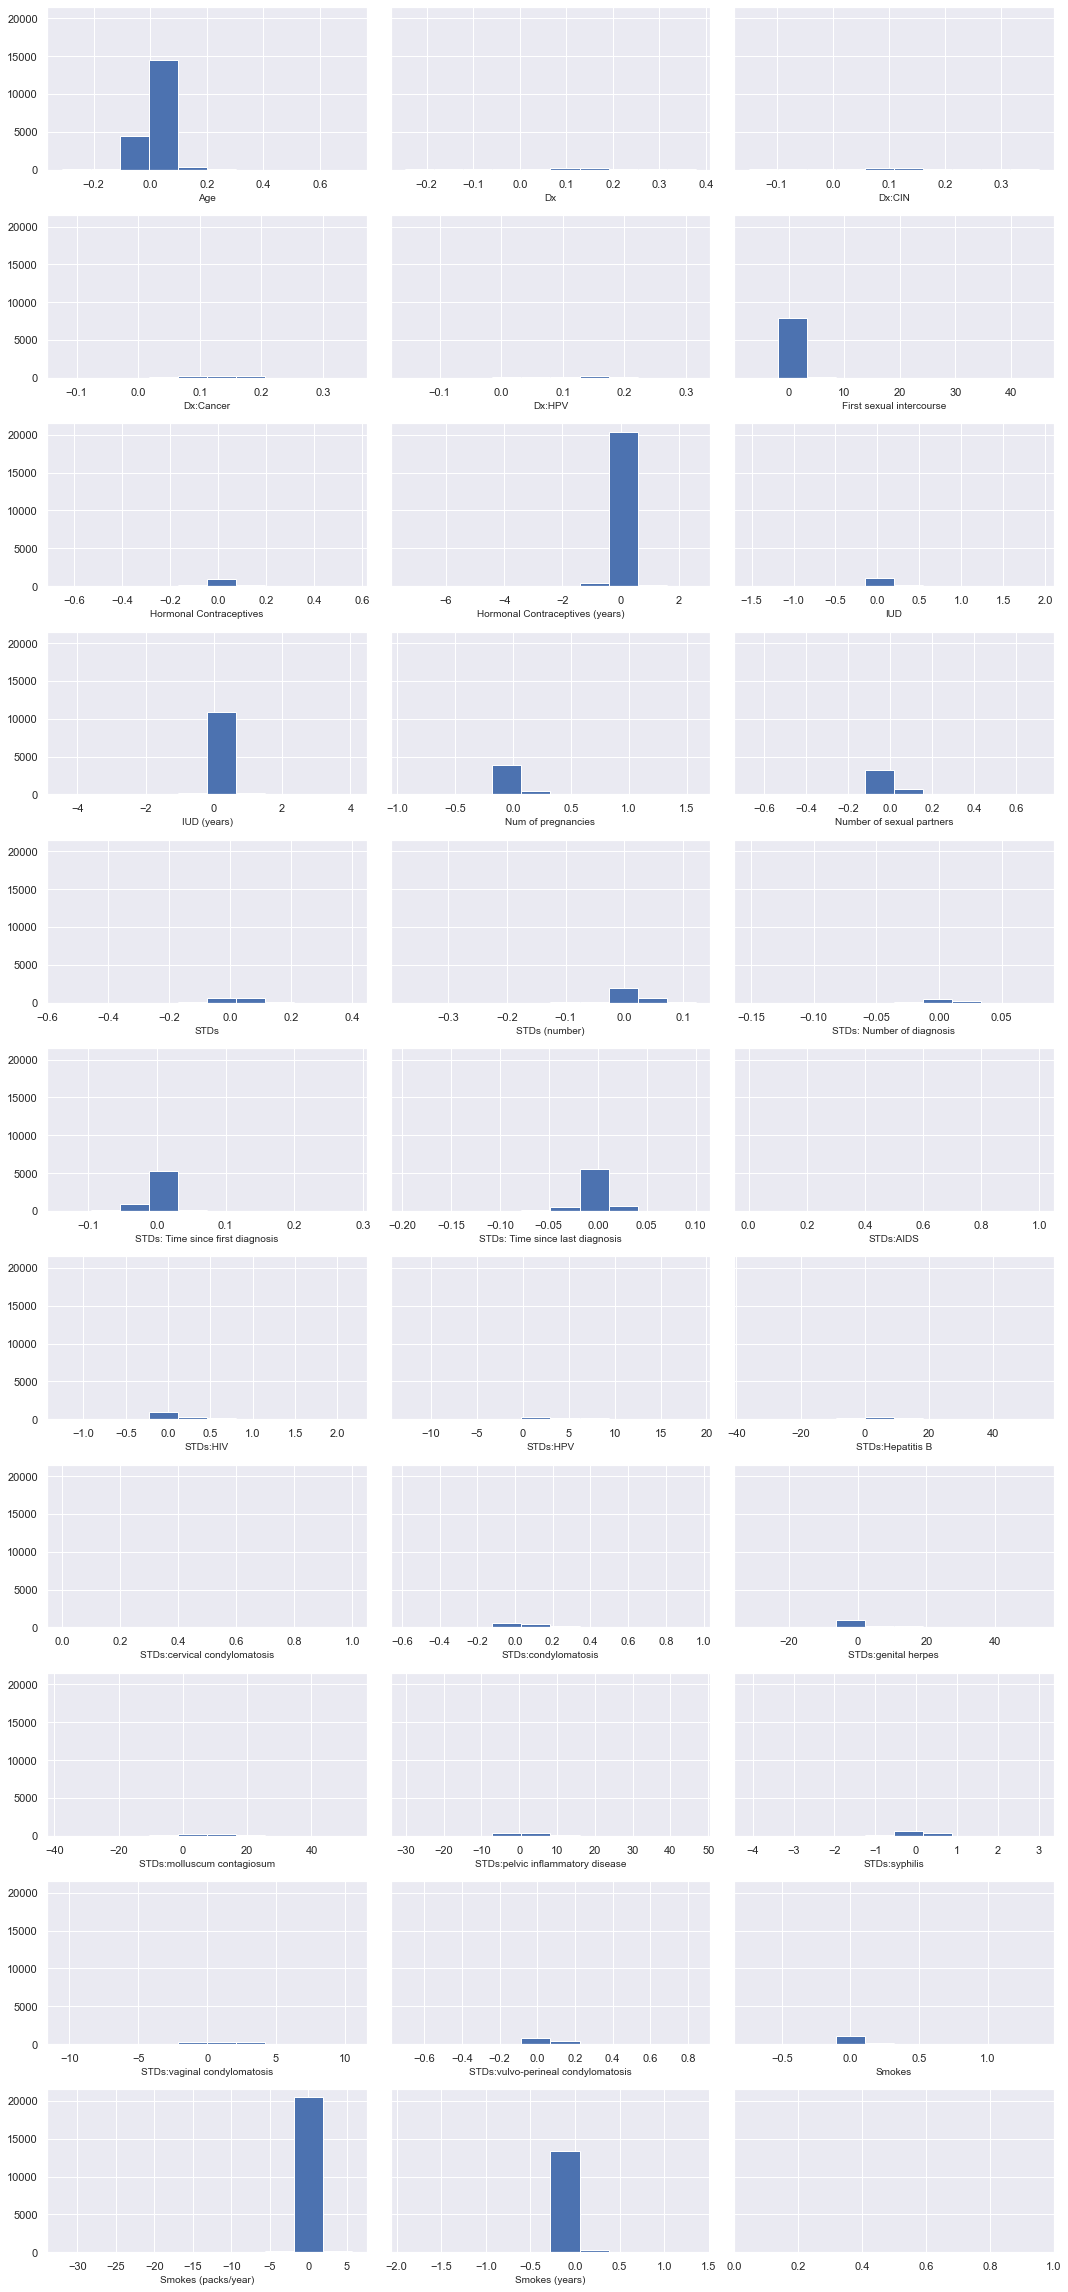

In [296]:
ice.feature_impact_hist(results_root("ice-plot-from-class/all_histograms.pdf"))

In [297]:
b = pd.DataFrame({'Feature':X.columns, 
              'RF FI':rf.feature_importances_*100})\
    .round(3)

In [298]:
a = ice.feature_impact_table()\
    .merge(b, how = "inner", on = "Feature")\
    .round(2)

In [299]:
a\
    .sort_values('Normalized In-Dist Feature Impact', ascending = False)

,Feature,Feature Impact,In-Dist Feature Impact,Normalized Feature Impact,Normalized In-Dist Feature Impact,RF FI
23,STDs:Hepatitis B,2.41,2.14,19.15,18.81,0.15
20,STDs:molluscum contagiosum,2.32,2.06,18.46,18.13,0.19
19,STDs:genital herpes,1.92,1.68,15.26,14.78,0.92
18,STDs:pelvic inflammatory disease,1.34,1.19,10.69,10.49,0.10
2,First sexual intercourse,0.87,0.96,6.89,8.41,12.31
24,STDs:HPV,0.96,0.86,7.68,7.53,0.13
6,Smokes (packs/year),0.48,0.50,3.82,4.42,3.50
15,STDs:vaginal condylomatosis,0.47,0.41,3.71,3.64,0.20
8,Hormonal Contraceptives (years),0.38,0.40,3.02,3.52,15.58
10,IUD (years),0.23,0.26,1.85,2.30,3.97
